In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('USA_Housing.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79249,6,7,3,40173,1505891
1,61287,6,9,5,36882,1058988
2,63345,7,6,3,34310,1260617
3,59982,5,8,4,26354,630943
4,80176,5,6,4,26748,1068138


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Avg. Area Income              498 non-null    int64
 1   Avg. Area House Age           498 non-null    int64
 2   Avg. Area Number of Rooms     498 non-null    int64
 3   Avg. Area Number of Bedrooms  498 non-null    int64
 4   Area Population               498 non-null    int64
 5   Price                         498 non-null    int64
dtypes: int64(6)
memory usage: 23.5 KB


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02
mean,68110.132530,6.032129,6.963855,3.746988,35743.598394,1.226756e+06
std,10347.155256,1.043795,1.075939,1.217016,9895.527956,3.469993e+05
min,17797.000000,4.000000,3.000000,2.000000,173.000000,1.520720e+05
25%,61084.250000,5.000000,6.000000,3.000000,29442.500000,1.010952e+06
50%,68491.500000,6.000000,7.000000,4.000000,35800.000000,1.229480e+06
75%,75179.000000,7.000000,8.000000,4.000000,42232.500000,1.450948e+06
max,97112.000000,9.000000,10.000000,6.000000,69575.000000,2.469066e+06


In [6]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [7]:

data = pd.read_csv('USA_Housing.csv')

float_cols = data.select_dtypes(include='float').columns

data[float_cols] = data[float_cols].round().astype('Int64')

data.to_csv('USA_Housing.csv', index=False)

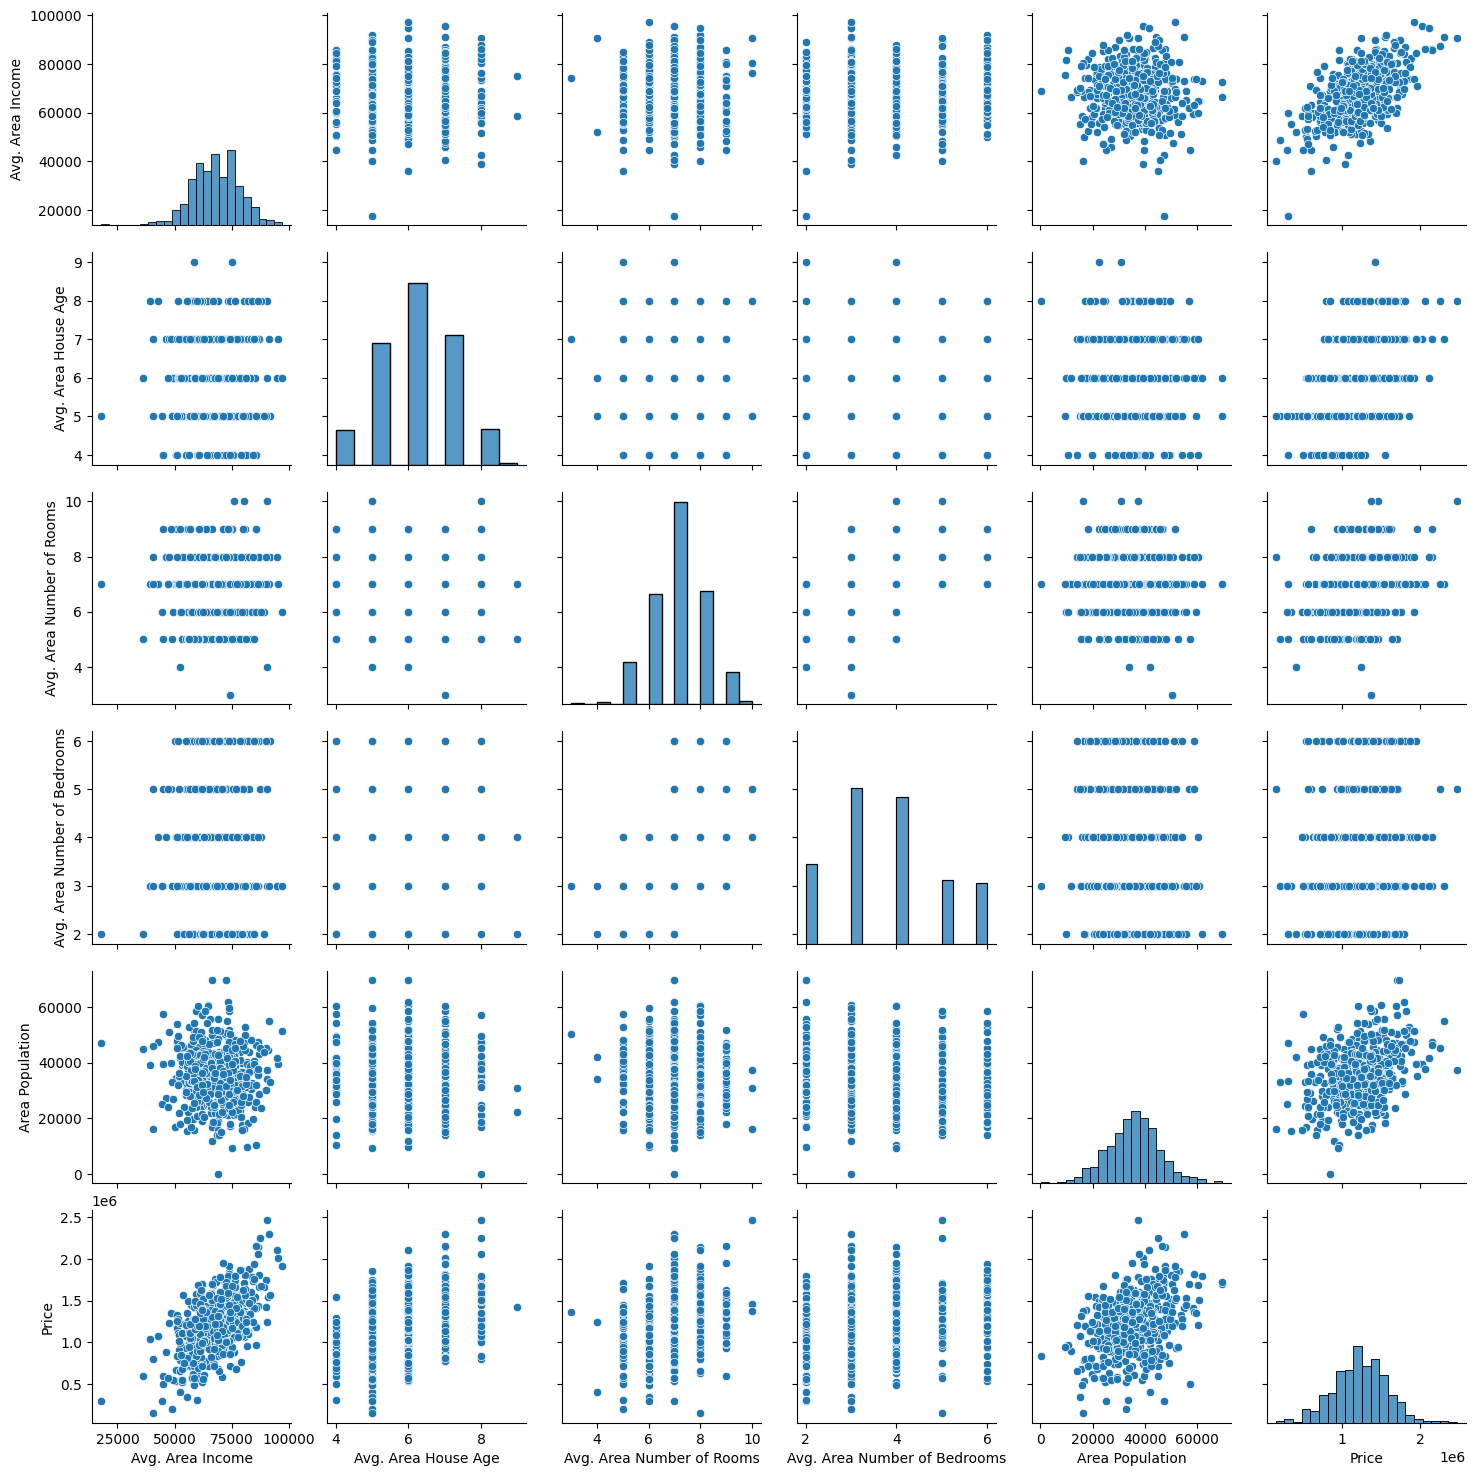

In [8]:
sns.pairplot(data)

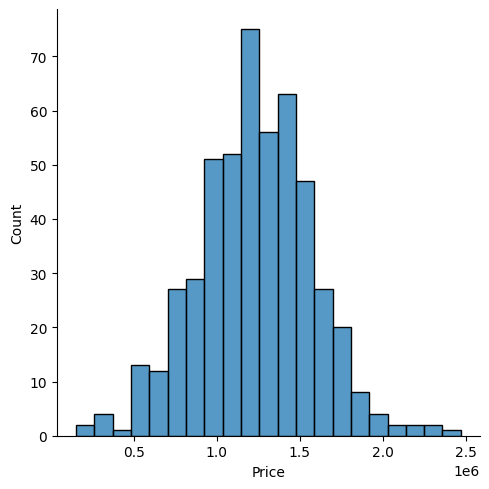

In [9]:
sns.displot(data['Price'])

<Axes: >

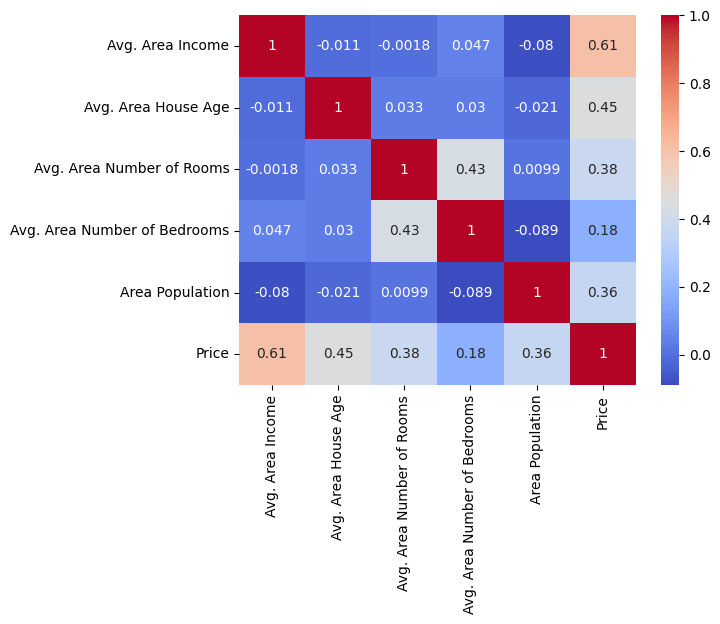

In [10]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

In [11]:

x=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y =data['Price']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
print(model.intercept_)

-2388035.2556140395


In [ ]:

coeff_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.362851
Avg. Area House Age,142068.500409
Avg. Area Number of Rooms,109251.665643
Avg. Area Number of Bedrooms,6544.760958
Area Population,14.463119


In [17]:
pred=model.predict(x_test)

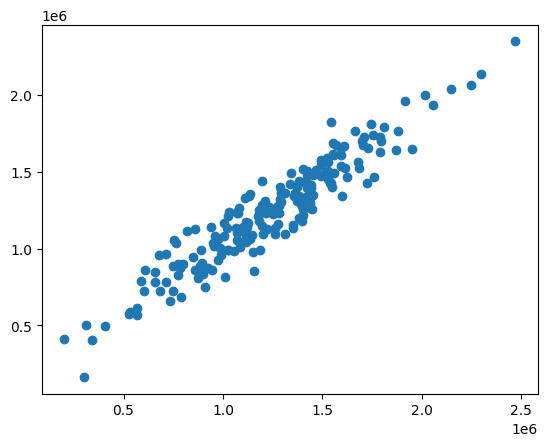

In [18]:
plt.scatter(y_test,pred)

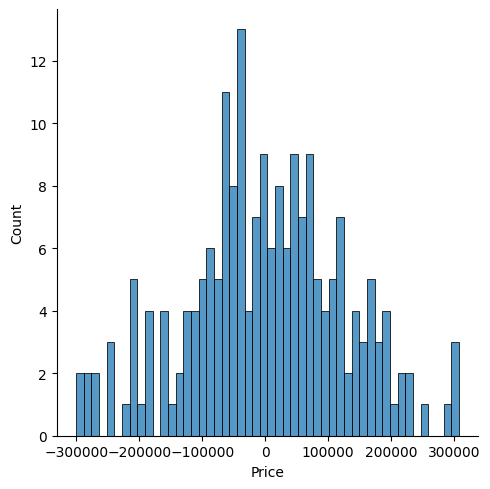

In [19]:
sns.displot((y_test-pred),bins=50);

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 99754.6216533506
MSE: 15806420336.124922
RMSE: 125723.58703172974


In [21]:
model.score(x,y)

0.8828016535936353

In [31]:
import pickle

In [32]:
with open('HousePricePridiction_pickle','wb') as f:
    pickle.dump(model,f)

In [33]:
with open('HousePricePridiction_pickle','rb') as f:
    mp=pickle.load(f)

In [25]:
new_data = pd.DataFrame([[64491,4,5,4,40359]], columns=["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"])
mp.predict(new_data)


array([714104.74842198])

In [26]:
import joblib

In [27]:
joblib.dump(model,"HousePricePridiction_joblib")

['HousePricePridiction_joblib']

In [28]:
mj=joblib.load("HousePricePridiction_joblib")

In [29]:
new_data = pd.DataFrame([[64491,4,5,4,40359]], columns=["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"])
mj.predict(new_data)

array([714104.74842198])

In [30]:
mj.intercept_

np.float64(-2388035.2556140395)